<a href="https://www.kaggle.com/code/dascient/falcon-space-antigravity?scriptVersionId=150325573" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# login to binance
from IPython.display import clear_output

!pip install schedule
!pip install pykalman
!pip install -U git+https://github.com/twopirllc/pandas-ta
!pip install plotly

import schedule,warnings,time,ast
from pykalman import KalmanFilter
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from dateutil.tz import tzlocal
from rich import print, pretty
from datetime import datetime
from random import randint
from random import seed
import pandas_ta as ta
import pandas as pd
import numpy as np
pretty.install()
import os

clear_output()
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output
from matplotlib import pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from geopandas import GeoDataFrame
import matplotlib.colors as colors
import seaborn as sns
import random as r

# Usual Libraries
import seaborn as sns
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print('File:',os.path.join(dirname, filename))

# settings
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

# set plot margin limits
#plt.xlim(right=xmax) #xmax is your value
#plt.xlim(left=xmin) #xmin is your value
#plt.ylim(top=ymax) #ymax is your value/
#plt.ylim(bottom=ymin) #ymin is your value
#clear_output()

#clear_output()
print("Data loaded.")

  Cloning https://github.com/twopirllc/pandas-ta to /tmp/pip-req-build-3wazr_g8
  Running command git clone --filter=blob:none --quiet https://github.com/twopirllc/pandas-ta /tmp/pip-req-build-3wazr_g8
  Resolved https://github.com/twopirllc/pandas-ta to commit 084dbe1c4b76082f383fa3029270ea9ac35e4dc7
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=219767 sha256=6687f181444be5388eb67619d6a5deb292925d7b1712bc3052e8a4f738db24bc
  Stored in directory: /tmp/pip-ephem-wheel-cache-lge8mws6/wheels/7f/03/8e/6c5ec9c051db18ca4f345a3bee3371a11b95cce48fdbe1f51e
Successfully built pandas-ta


FileNotFoundError: [Errno 2] No such file or directory: '/opt/conda/lib/python3.10/site-packages/numpy-1.24.3.dist-info/METADATA'

In [ ]:
# Gauss Range = Tesla/10,000
# 28.025 Ghz 
# Tesla/3 = x Ghz

# Earth's gravity is 1/2*Gauss

# Step reading is important. 

# say 9.88 (frequency mentioned on chart), if you want to figure out where larmore-frquency then divide by 28.025 = 0.3525 = 3,525Guass = .3525Tesla

# if frequency is changed, then expect blips to occur at different positions

# take frequency 

# compare apples to apples between charts using the graphs right-descriptions

# kilo-mega-cycles, instead Ghz.
# intead of Gauss, killer oesterids.

# if frequency is different for samnple, then each sample collection should be off-set proportionally

# if there';s a 10% frequency change, then the blip should move up a bit as well. 
# make sure to compare each charts with Guass Range & Frequency being accounted for


# DELIVERABLE for Mark.
# End of day, "Hey mark.. there's a bliip here . this range, this frequency, which correlates to 27.95 Ghz" ... gyro-magnetic ratio of electrons
# https://physics.nist.gov/cgi-bin/cuu/Value?gammae
# https://en.wikipedia.org/wiki/Gyromagnetic_ratio

In [5]:
df = pd.read_excel('/kaggle/input/falcon-space/Master Sheet.xlsx',header=0,sheet_name='raw data')
df.head()

62023A  62023B  62023C  62023D  62023E  62023F  Unnamed: 6  62123A  62123B  \
0  2.6209  2.6241  2.6195  2.6188  2.6113  2.6124         NaN  2.6782  2.7555   
1  2.6212  2.6241  2.6195  2.6188  2.6113  2.6124         NaN  2.6786  2.7464   
2  2.6217  2.6241  2.6195  2.6187  2.6115  2.6124         NaN  2.6791  2.7334   
3  2.6221  2.6241  2.6195  2.6184  2.6132  2.6124         NaN  2.6795  2.7140   
4  2.6244  2.6242  2.6195  2.6184  2.6132  2.6124         NaN  2.6800  2.6755   

   62123C  62123D  62123E  Unnamed: 12  62223A  Unnamed: 14  62323A  62323B  \
0  2.6731  2.7527  2.7684          NaN  2.6390          NaN  0.9899  0.9936   
1  2.6644  2.7538  2.7572          NaN  2.6389          NaN  0.9894  0.9936   
2  2.6483  2.7606  2.7461          NaN  2.6388          NaN  0.9894  0.9936   
3  2.6471  2.7627  2.7303          NaN  2.6375          NaN  0.9894  0.9936   
4  2.6459  2.7893  2.6802          NaN  2.6378          NaN  0.9894  0.9937   

   62323C  Unnamed: 18  63023A  63023B  Unnamed: 21   7623A  0.9847  
0  0.9927          NaN  0.9836  0.9847          NaN  0.9875  0.9847  
1  0.9927          NaN  0.9838  0.9848          NaN  0.9873  0.9847  
2  0.9927          NaN  0.9867  0.9857          NaN  0.9867  0.9846  
3  0.9926          NaN  0.9867  0.9857          NaN  0.9863  0.9845  
4  0.9921          NaN  0.9863  0.9845          NaN  0.9846  0.9845

<Axes: >

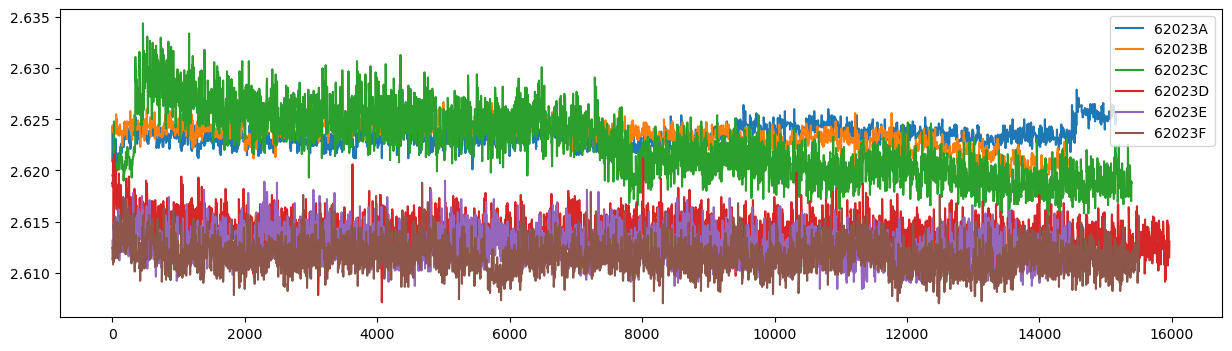

In [5]:
# focals '62023A','62023B','62023C','62023D','62023E','62023F'

df[['62023A','62023B','62023C','62023D','62023E','62023F']].plot(figsize=(15,4))

<Axes: >

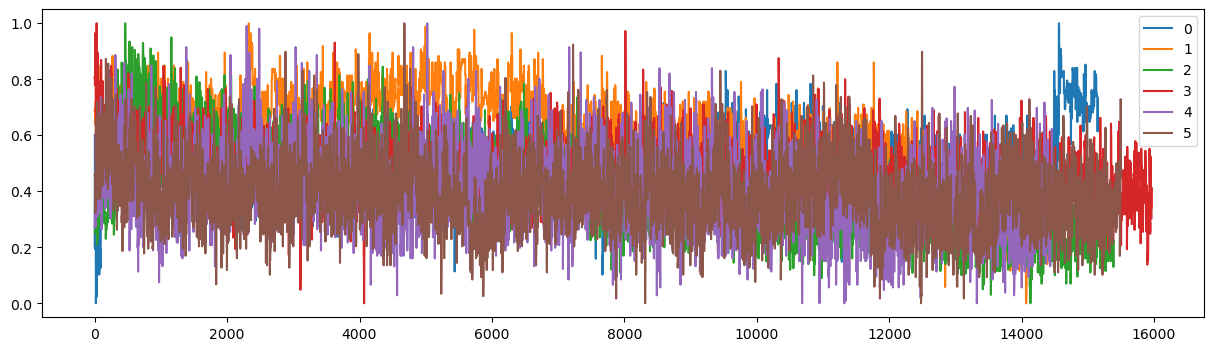

In [7]:
# Master Sheet, normalized 
# focals '62023A','62023B','62023C','62023D','62023E','62023F'
import pandas as pd
from sklearn import preprocessing

x = df[['62023A','62023B','62023C','62023D','62023E','62023F']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df= pd.DataFrame(x_scaled)
normalized_df.plot(figsize=(15,4))

In [ ]:
# 

# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023A.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df1 = read_file.T
df1

#File Name – 62023A		
#Sample - 2.62 gram aluminum cooled in magnetic field covered with ferro fluid.		
#Test chamber – TM 110		
#Frequency - 9.78133 ghz at -40 dbm per smp02 signal generator, no pulse.		
#Sweep range – steps 10,000 – 25,000, ramp delay 300mS, settling delay 3mS		
#Gauss range – 2000 - 4940		
#Start time - 12:02 PM EST		
#End time- 1:24pm EST		

In [4]:
# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023B.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df2 = read_file.T
df2

0               1               2               3      \
0  +   2.6241      +   2.6241 g    +   2.6241 g    +   2.6241 g     

            4               5               6               7      \
0  +   2.6242      +   2.6242      +   2.6237      +   2.6237       

            8               9               10              11     \
0  +   2.6237      +   2.6237      +   2.6242      +   2.6242       

            12              13              14              15     \
0  +   2.6242      +   2.6242      +   2.6243      +   2.6244       

            16              17              18              19     \
0  +   2.6243      +   2.6243      +   2.6243      +   2.6241       

            20              21              22              23     \
0  +   2.6241      +   2.6241      +   2.6241      +   2.6241 g     

            24              25              26              27     \
0  +   2.6241 g    +   2.6241 g    +   2.6241 g    +   2.6241 g     

            28              29              30              31     \
0  +   2.6241 g    +   2.6241 g    +   2.6241 g    +   2.6241 g     

            32              33              34              35     \
0  +   2.6241 g    +   2.6241 g    +   2.6241 g    +   2.6241 g     

            36              37              38              39     \
0  +   2.6242 g    +   2.6242 g    +   2.6242 g    +   2.6242 g     

            40              41              42              43     \
0  +   2.6242 g    +   2.6242 g    +   2.6242 g    +   2.6242 g     

            44              45              46              47     \
0  +   2.6242 g    +   2.6242      +   2.6236      +   2.6236       

            48              49              50              51     \
0  +   2.6237      +   2.6237 g    +   2.6237 g    +   2.6237 g     

            52              53              54              55     \
0  +   2.6237 g    +   2.6237 g    +   2.6237 g    +   2.6253       

            56              57              58              59     \
0  +   2.6255      +   2.6253      +   2.6251      +   2.6249       

            60              61              62              63     \
0  +   2.6249      +   2.6245      +   2.6246      +   2.6246       

            64              65              66              67     \
0  +   2.6248      +   2.6249      +   2.6250      +   2.6250       

            68              69              70              71     \
0  +   2.6250      +   2.6250      +   2.6242      +   2.6242       

            72              73              74              75     \
0  +   2.6242      +   2.6242      +   2.6243      +   2.6243       

            76              77              78              79     \
0  +   2.6236      +   2.6235      +   2.6235      +   2.6238       

            80              81              82              83     \
0  +   2.6239      +   2.6241      +   2.6241      +   2.6241       

            84              85              86              87     \
0  +   2.6241 g    +   2.6241 g    +   2.6241 g    +   2.6241 g     

            88              89              90              91     \
0  +   2.6241 g    +   2.6241 g    +   2.6241 g    +   2.6241 g     

            92              93              94              95     \
0  +   2.6241 g    +   2.6241 g    +   2.6241 g    +   2.6241 g     

            96              97              98              99     \
0  +   2.6241 g    +   2.6241 g    +   2.6241 g    +   2.6241 g     

            100             101             102             103    \
0  +   2.6241 g    +   2.6241 g    +   2.6234      +   2.6234       

            104             105             106             107    \
0  +   2.6234      +   2.6235      +   2.6235      +   2.6235       

            108             109             110             111    \
0  +   2.6235      +   2.6235 g    +   2.6235 g    +   2.6235 g     

            112             113             114             115    \
0  +   2.6236      +   2.6237      +   2.6245      

In [5]:
# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023C.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df3 = read_file.T
df3

0               1               2               3      \
0  +   2.6195      +   2.6195      +   2.6195      +   2.6195       

            4               5               6               7      \
0  +   2.6195 g    +   2.6195 g    +   2.6196 g    +   2.6196 g     

            8               9               10              11     \
0  +   2.6196 g    +   2.6196 g    +   2.6196 g    +   2.6196 g     

            12              13              14              15     \
0  +   2.6196 g    +   2.6196 g    +   2.6196 g    +   2.6195 g     

            16              17              18              19     \
0  +   2.6195 g    +   2.6195      +   2.6194      +   2.6200       

            20              21              22              23     \
0  +   2.6213      +   2.6226      +   2.6231      +   2.6243       

            24              25              26              27     \
0  +   2.6248      +   2.6242      +   2.6237      +   2.6220       

            28              29              30              31     \
0  +   2.6214      +   2.6204      +   2.6198      +   2.6192       

            32              33              34              35     \
0  +   2.6187      +   2.6186      +   2.6187      +   2.6189       

            36              37              38              39     \
0  +   2.6189      +   2.6189      +   2.6189      +   2.6190 g     

            40              41              42              43     \
0  +   2.6190 g    +   2.6190 g    +   2.6190 g    +   2.6191       

            44              45              46              47     \
0  +   2.6192      +   2.6192      +   2.6192      +   2.6192 g     

            48              49              50              51     \
0  +   2.6192 g    +   2.6197      +   2.6197      +   2.6197       

            52              53              54              55     \
0  +   2.6198      +   2.6198 g    +   2.6198 g    +   2.6198 g     

            56              57              58              59     \
0  +   2.6198 g    +   2.6198 g    +   2.6199 g    +   2.6199       

            60              61              62              63     \
0  +   2.6199      +   2.6199 g    +   2.6205      +   2.6205       

            64              65              66              67     \
0  +   2.6205      +   2.6205      +   2.6205 g    +   2.6205 g     

            68              69              70              71     \
0  +   2.6205 g    +   2.6206      +   2.6207      +   2.6207       

            72              73              74              75     \
0  +   2.6207      +   2.6207 g    +   2.6207 g    +   2.6207 g     

            76              77              78              79     \
0  +   2.6207 g    +   2.6207 g    +   2.6208 g    +   2.6208 g     

            80              81              82              83     \
0  +   2.6208      +   2.6208      +   2.6208 g    +   2.6208 g     

            84              85              86              87     \
0  +   2.6201      +   2.6201      +   2.6201      +   2.6201       

            88              89              90              91     \
0  +   2.6201 g    +   2.6201 g    +   2.6201 g    +   2.6201 g     

            92              93              94              95     \
0  +   2.6202 g    +   2.6202 g    +   2.6202 g    +   2.6203       

            96              97              98              99     \
0  +   2.6204      +   2.6204      +   2.6205      +   2.6205       

            100             101             102             103    \
0  +   2.6215      +   2.6215      +   2.6208      +   2.6205       

            104             105             106             107    \
0  +   2.6201      +   2.6208      +   2.6208      +   2.6212       

            108             109             110             111    \
0  +   2.6212      +   2.6209      +   2.6209      +   2.6208       

            112             113             114             115    \
0  +   2.6208      +   2.6208      +   2.6208 g    

In [6]:
# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023D.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df4 = read_file.T
df4

0               1               2               3      \
0  +   2.6188      +   2.6188      +   2.6187      +   2.6184       

            4               5               6               7      \
0  +   2.6184      +   2.6185      +   2.6187      +   2.6187       

            8               9               10              11     \
0  +   2.6211      +   2.6211      +   2.6208      +   2.6207       

            12              13              14              15     \
0  +   2.6206      +   2.6205      +   2.6193      +   2.6181       

            16              17              18              19     \
0  +   2.6153      +   2.6144      +   2.6144      +   2.6156       

            20              21              22              23     \
0  +   2.6159      +   2.6166      +   2.6177      +   2.6182       

            24              25              26              27     \
0  +   2.6192      +   2.6181      +   2.6188      +   2.6197       

            28              29              30              31     \
0  +   2.6203      +   2.6216      +   2.6211      +   2.6206       

            32              33              34              35     \
0  +   2.6189      +   2.6193      +   2.6193      +   2.6184       

            36              37              38              39     \
0  +   2.6178      +   2.6168      +   2.6168      +   2.6177       

            40              41              42              43     \
0  +   2.6182      +   2.6201      +   2.6195      +   2.6195       

            44              45              46              47     \
0  +   2.6195      +   2.6198      +   2.6199      +   2.6199       

            48              49              50              51     \
0  +   2.6199      +   2.6199 g    +   2.6199 g    +   2.6198       

            52              53              54              55     \
0  +   2.6186      +   2.6172      +   2.6172      +   2.6167       

            56              57              58              59     \
0  +   2.6167      +   2.6168      +   2.6172      +   2.6172       

            60              61              62              63     \
0  +   2.6172      +   2.6172      +   2.6171      +   2.6162       

            64              65              66              67     \
0  +   2.6163      +   2.6186      +   2.6181      +   2.6181       

            68              69              70              71     \
0  +   2.6183      +   2.6184      +   2.6184      +   2.6184       

            72              73              74              75     \
0  +   2.6185      +   2.6185      +   2.6185 g    +   2.6185 g     

            76              77              78              79     \
0  +   2.6186 g    +   2.6186      +   2.6186      +   2.6186 g     

            80              81              82              83     \
0  +   2.6186 g    +   2.6186      +   2.6181      +   2.6175       

            84              85              86              87     \
0  +   2.6156      +   2.6150      +   2.6153      +   2.6157       

            88              89              90              91     \
0  +   2.6160      +   2.6161      +   2.6161      +   2.6162       

            92              93              94              95     \
0  +   2.6163      +   2.6172      +   2.6172      +   2.6172       

            96              97              98              99     \
0  +   2.6174      +   2.6197      +   2.6192      +   2.6186       

            100             101             102             103    \
0  +   2.6180      +   2.6162      +   2.6167      +   2.6173       

            104             105             106             107    \
0  +   2.6175      +   2.6174      +   2.6176      +   2.6177       

            108             109             110             111    \
0  +   2.6176      +   2.6176      +   2.6176      +   2.6176       

            112             113             114             115    \
0  +   2.6175      +   2.6169      +   2.6169      

In [7]:
# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023E.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df5 = read_file.T
df5

0               1               2               3      \
0  +   2.6113      +   2.6113      +   2.6115      +   2.6132       

            4               5               6               7      \
0  +   2.6132      +   2.6132      +   2.6132      +   2.6130       

            8               9               10              11     \
0  +   2.6113      +   2.6113      +   2.6113      +   2.6113       

            12              13              14              15     \
0  +   2.6113 g    +   2.6113 g    +   2.6113 g    +   2.6113 g     

            16              17              18              19     \
0  +   2.6113 g    +   2.6114      +   2.6148      +   2.6138       

            20              21              22              23     \
0  +   2.6131      +   2.6129      +   2.6129      +   2.6128       

            24              25              26              27     \
0  +   2.6130      +   2.6130      +   2.6131      +   2.6131       

            28              29              30              31     \
0  +   2.6138      +   2.6138      +   2.6138      +   2.6138       

            32              33              34              35     \
0  +   2.6138 g    +   2.6139 g    +   2.6139 g    +   2.6139 g     

            36              37              38              39     \
0  +   2.6139 g    +   2.6140      +   2.6140      +   2.6141       

            40              41              42              43     \
0  +   2.6135      +   2.6130      +   2.6130      +   2.6131       

            44              45              46              47     \
0  +   2.6133      +   2.6135      +   2.6140      +   2.6128       

            48              49              50              51     \
0  +   2.6118      +   2.6117      +   2.6121      +   2.6123       

            52              53              54              55     \
0  +   2.6123      +   2.6124      +   2.6128      +   2.6133       

            56              57              58              59     \
0  +   2.6139      +   2.6144      +   2.6154      +   2.6152       

            60              61              62              63     \
0  +   2.6146      +   2.6140      +   2.6127      +   2.6129       

            64              65              66              67     \
0  +   2.6136      +   2.6137      +   2.6136      +   2.6135       

            68              69              70              71     \
0  +   2.6130      +   2.6129      +   2.6129      +   2.6123       

            72              73              74              75     \
0  +   2.6123      +   2.6119      +   2.6123      +   2.6127       

            76              77              78              79     \
0  +   2.6127      +   2.6128      +   2.6131      +   2.6130       

            80              81              82              83     \
0  +   2.6129      +   2.6129      +   2.6119      +   2.6119       

            84              85              86              87     \
0  +   2.6120      +   2.6135      +   2.6132      +   2.6133       

            88              89              90              91     \
0  +   2.6132      +   2.6132      +   2.6130      +   2.6129       

            92              93              94              95     \
0  +   2.6129      +   2.6131      +   2.6162      +   2.6157       

            96              97              98              99     \
0  +   2.6156      +   2.6154      +   2.6152      +   2.6151       

            100             101             102             103    \
0  +   2.6140      +   2.6134      +   2.6117      +   2.6117       

            104             105             106             107    \
0  +   2.6112      +   2.6112      +   2.6117      +   2.6123       

            108             109             110             111    \
0  +   2.6145      +   2.6145      +   2.6138      +   2.6135       

            112             113             114             115    \
0  +   2.6133      +   2.6128      +   2.6128      

In [8]:
# check amount of time this session ran for
# ~3.333 steps per second - 75mins to run 
read_file = pd.read_csv (r'/kaggle/input/falcon-space/62023F.TXT',header=None)
#read_file.to_csv (r'/kaggle/input/falcon-space/62023A.csv', index=None)
df6 = read_file.T
df6

0               1               2               3      \
0  +   2.6124 g    +   2.6124 g    +   2.6124 g    +   2.6124 g     

            4               5               6               7      \
0  +   2.6124 g    +   2.6125      +   2.6125      +   2.6114       

            8               9               10              11     \
0  +   2.6108      +   2.6108      +   2.6113      +   2.6118       

            12              13              14              15     \
0  +   2.6115      +   2.6112      +   2.6111      +   2.6110       

            16              17              18              19     \
0  +   2.6113      +   2.6121      +   2.6147      +   2.6147       

            20              21              22              23     \
0  +   2.6142      +   2.6142      +   2.6142      +   2.6142       

            24              25              26              27     \
0  +   2.6144      +   2.6145      +   2.6148      +   2.6143       

            28              29              30              31     \
0  +   2.6138      +   2.6134      +   2.6134      +   2.6134       

            32              33              34              35     \
0  +   2.6134      +   2.6134 g    +   2.6134 g    +   2.6134 g     

            36              37              38              39     \
0  +   2.6139      +   2.6151      +   2.6155      +   2.6150       

            40              41              42              43     \
0  +   2.6145      +   2.6136      +   2.6138      +   2.6137       

            44              45              46              47     \
0  +   2.6133      +   2.6127      +   2.6114      +   2.6123       

            48              49              50              51     \
0  +   2.6130      +   2.6132      +   2.6134      +   2.6129       

            52              53              54              55     \
0  +   2.6129      +   2.6124      +   2.6128      +   2.6133       

            56              57              58              59     \
0  +   2.6140      +   2.6140      +   2.6140      +   2.6140       

            60              61              62              63     \
0  +   2.6138      +   2.6124      +   2.6124      +   2.6124       

            64              65              66              67     \
0  +   2.6126      +   2.6128      +   2.6131      +   2.6150       

            68              69              70              71     \
0  +   2.6150      +   2.6149      +   2.6136      +   2.6130       

            72              73              74              75     \
0  +   2.6121      +   2.6134      +   2.6139      +   2.6149       

            76              77              78              79     \
0  +   2.6149      +   2.6137      +   2.6129      +   2.6119       

            80              81              82              83     \
0  +   2.6119      +   2.6115      +   2.6115      +   2.6115       

            84              85              86              87     \
0  +   2.6114      +   2.6115 g    +   2.6115      +   2.6116       

            88              89              90              91     \
0  +   2.6118      +   2.6136      +   2.6136      +   2.6132       

            92              93              94              95     \
0  +   2.6129      +   2.6133      +   2.6133      +   2.6133       

            96              97              98              99     \
0  +   2.6132      +   2.6132      +   2.6135      +   2.6135       

            100             101             102             103    \
0  +   2.6141      +   2.6141      +   2.6141      +   2.6139       

            104             105             106             107    \
0  +   2.6119      +   2.6121      +   2.6123      +   2.6123       

            108             109             110             111    \
0  +   2.6127      +   2.6130      +   2.6133      +   2.6146       

            112             113             114             115    \
0  +   2.6146      +   2.6151      +   2.6156      

## Mark's Excel Outputs

In [4]:
df = pd.read_csv('/kaggle/input/falcon-space/raw-data-master.csv',header=0)

# 62023A	62023B	62023C	62023D	62023E	62023F 62123A	62123B	62123C	62123D	62123E	62223A ~ 2.somethings
# 62323A	62323B	62323C ~ 0.99somethings
df

62023A  62023B  62023C  62023D  62023E  62023F  62123A  62123B  62123C  \
0      2.6209  2.6241  2.6195  2.6188  2.6113  2.6124  2.6782  2.7555  2.6731   
1      2.6212  2.6241  2.6195  2.6188  2.6113  2.6124  2.6786  2.7464  2.6644   
2      2.6217  2.6241  2.6195  2.6187  2.6115  2.6124  2.6791  2.7334  2.6483   
3      2.6221  2.6241  2.6195  2.6184  2.6132  2.6124  2.6795  2.7140  2.6471   
4      2.6244  2.6242  2.6195  2.6184  2.6132  2.6124  2.6800  2.6755  2.6459   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15958     NaN     NaN     NaN  2.6121     NaN     NaN     NaN     NaN     NaN   
15959     NaN     NaN     NaN  2.6122     NaN     NaN     NaN     NaN     NaN   
15960     NaN     NaN     NaN  2.6131     NaN     NaN     NaN     NaN     NaN   
15961     NaN     NaN     NaN  2.6131     NaN     NaN     NaN     NaN     NaN   
15962     NaN     NaN     NaN  2.6115     NaN     NaN     NaN     NaN     NaN   

       62123D  62123E  62223A  62323A  62323B  62323C  
0      2.7527  2.7684  2.6390  0.9899  0.9936  0.9927  
1      2.7538  2.7572  2.6389  0.9894  0.9936  0.9927  
2      2.7606  2.7461  2.6388  0.9894  0.9936  0.9927  
3      2.7627  2.7303  2.6375  0.9894  0.9936  0.9926  
4      2.7893  2.6802  2.6378  0.9894  0.9937  0.9921  
...       ...     ...     ...     ...     ...     ...  
15958     NaN     NaN     NaN     NaN     NaN     NaN  
15959     NaN     NaN     NaN     NaN     NaN     NaN  
15960     NaN     NaN     NaN     NaN     NaN     NaN  
15961     NaN     NaN     NaN     NaN     NaN     NaN  
15962     NaN     NaN     NaN     NaN     NaN     NaN  

[15963 rows x 15 columns]

<Axes: >

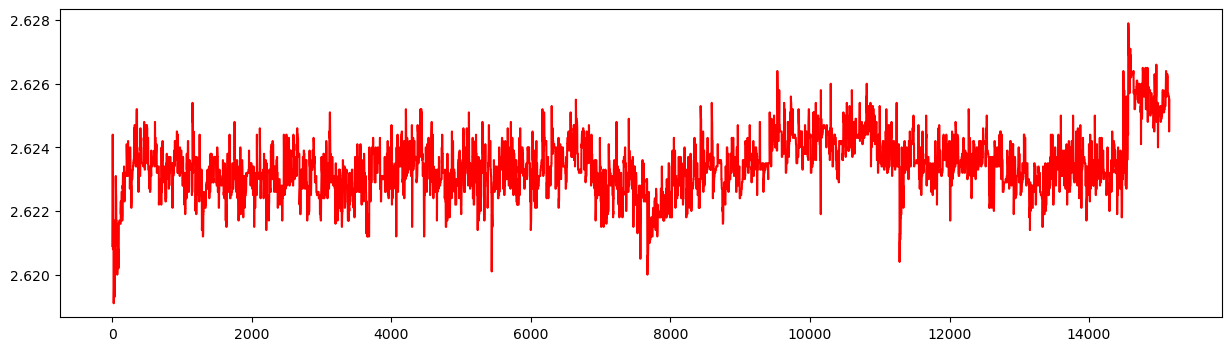

In [15]:
df['62023A'].plot(color='r',figsize=(15,4))

<Axes: >

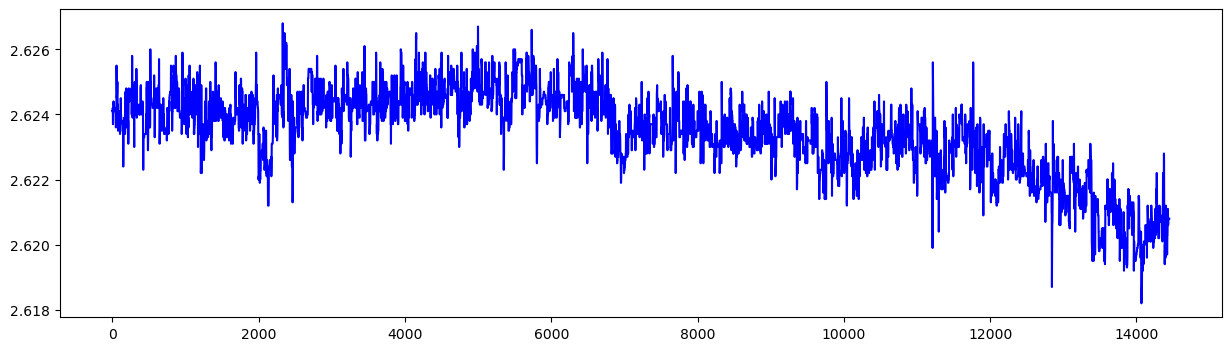

In [16]:
df['62023B'].plot(color='b',figsize=(15,4))

<Axes: >

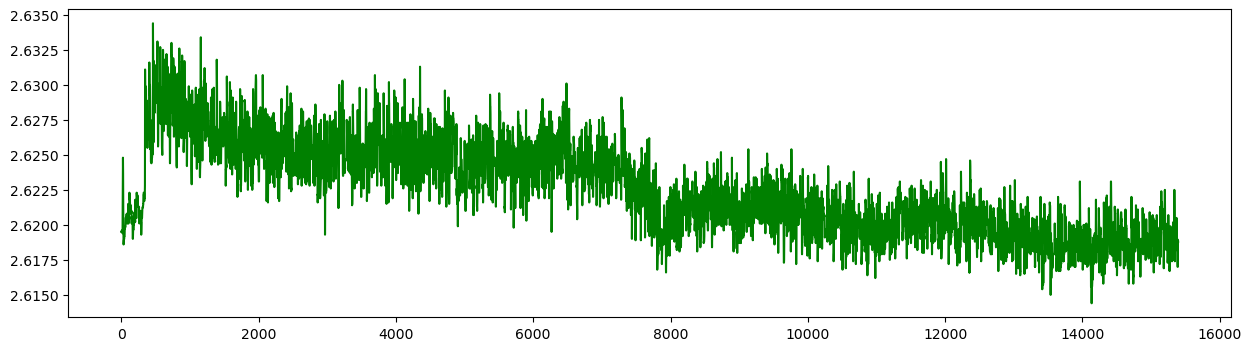

In [18]:
df['62023C'].plot(color='g',figsize=(15,4))

<Axes: >

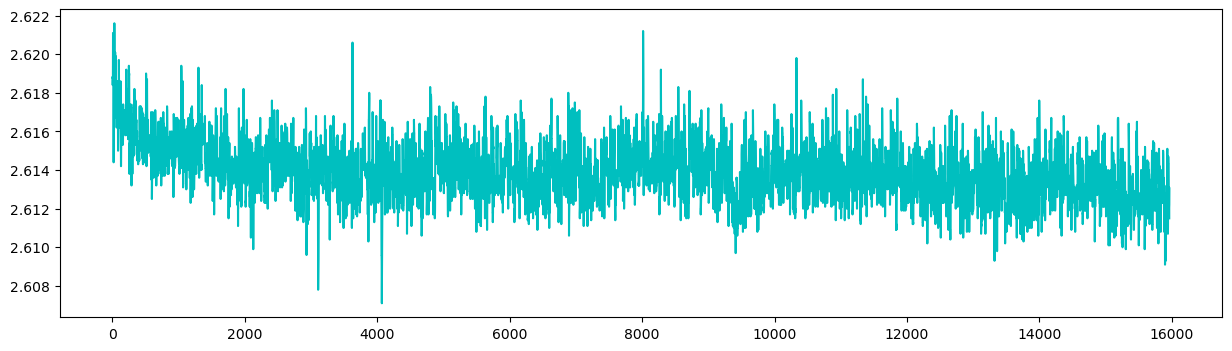

In [19]:
df['62023D'].plot(color='c',figsize=(15,4))

<Axes: >

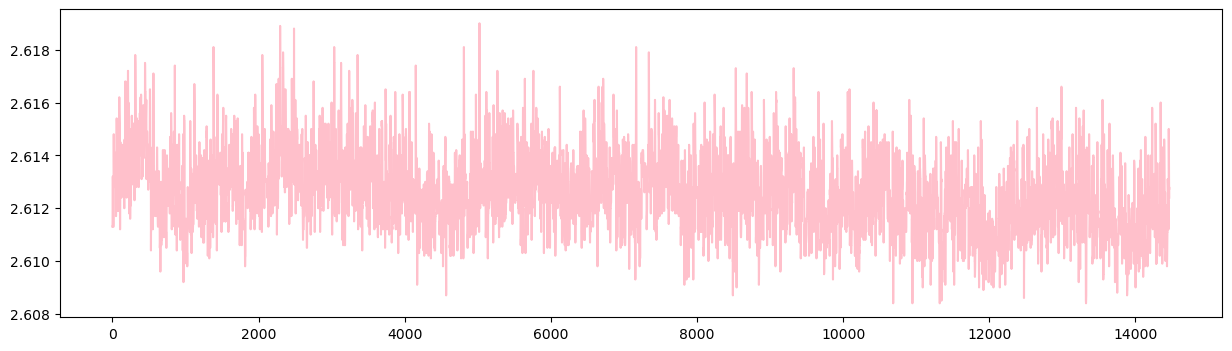

In [22]:
df['62023E'].plot(color='pink',figsize=(15,4))

<Axes: >

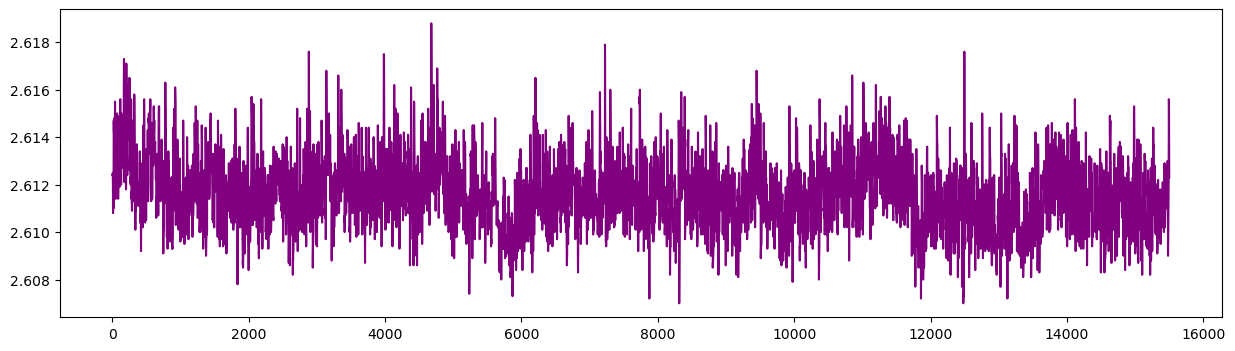

In [23]:
df['62023F'].plot(color='purple',figsize=(15,4))

In [6]:
import pandas as pd
from sklearn import preprocessing

df1 = df[['62023A','62023B','62023C','62023D','62023E','62023F','62123A','62123B','62123C','62123D','62123E','62223A']]
x = df1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df= pd.DataFrame(x_scaled)
normalized_df

0         1      2         3         4         5         6   \
0      0.204545  0.686047  0.255  0.806897  0.273585  0.457627  0.342190   
1      0.238636  0.686047  0.255  0.806897  0.273585  0.457627  0.345411   
2      0.295455  0.686047  0.255  0.800000  0.292453  0.457627  0.349436   
3      0.340909  0.686047  0.255  0.779310  0.452830  0.457627  0.352657   
4      0.602273  0.697674  0.255  0.779310  0.452830  0.457627  0.356683   
...         ...       ...    ...       ...       ...       ...       ...   
15958       NaN       NaN    NaN  0.344828       NaN       NaN       NaN   
15959       NaN       NaN    NaN  0.351724       NaN       NaN       NaN   
15960       NaN       NaN    NaN  0.413793       NaN       NaN       NaN   
15961       NaN       NaN    NaN  0.413793       NaN       NaN       NaN   
15962       NaN       NaN    NaN  0.303448       NaN       NaN       NaN   

             7         8         9         10        11  
0      0.956298  0.272802  0.705551  0.909609  0.602410  
1      0.878320  0.201315  0.714401  0.829893  0.590361  
2      0.766924  0.069022  0.769107  0.750890  0.578313  
3      0.600686  0.059162  0.786002  0.638434  0.421687  
4      0.270780  0.049302  1.000000  0.281851  0.457831  
...         ...       ...       ...       ...       ...  
15958       NaN       NaN       NaN       NaN       NaN  
15959       NaN       NaN       NaN       NaN       NaN  
15960       NaN       NaN       NaN       NaN       NaN  
15961       NaN       NaN       NaN       NaN       NaN  
15962       NaN       NaN       NaN       NaN       NaN  

[15963 rows x 12 columns]

<Axes: >

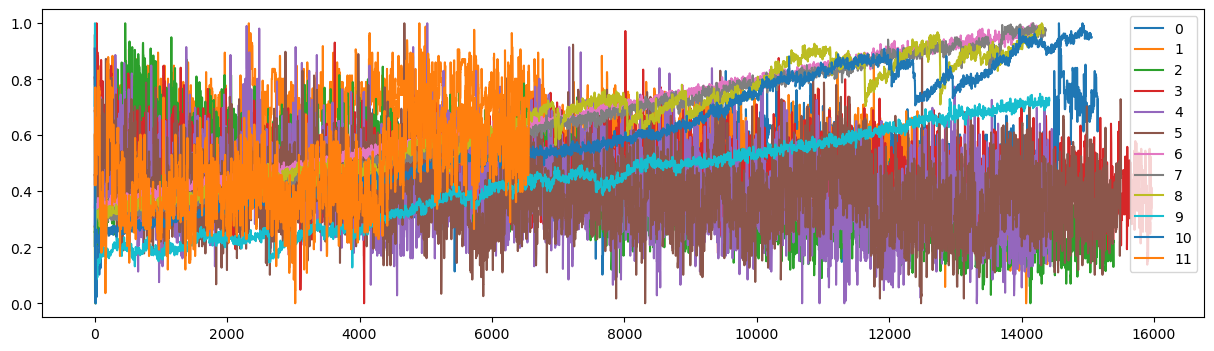

In [14]:
normalized_df.plot(figsize=(15,4))

In [9]:
# '62323A','62323B','62323C'
df2 = df[['62323A','62323B','62323C']]
x = df2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df2= pd.DataFrame(x_scaled)
normalized_df2

0         1         2
0      0.454545  0.666667  0.813953
1      0.413223  0.666667  0.813953
2      0.413223  0.666667  0.813953
3      0.413223  0.666667  0.802326
4      0.413223  0.677778  0.744186
...         ...       ...       ...
15958       NaN       NaN       NaN
15959       NaN       NaN       NaN
15960       NaN       NaN       NaN
15961       NaN       NaN       NaN
15962       NaN       NaN       NaN

[15963 rows x 3 columns]

<Axes: >

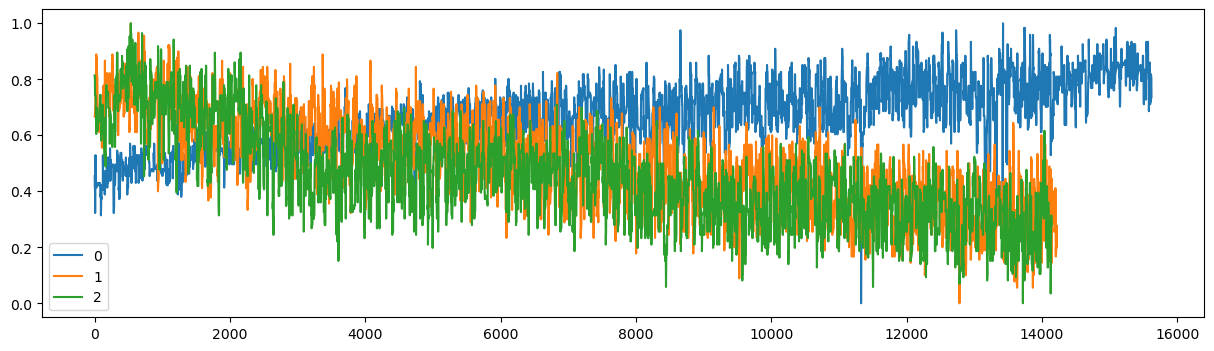

In [13]:
# normalized
normalized_df2.plot(figsize=(15,4))

# Technical Indications

In [6]:
df1 = df[['62023A','62023B','62023C','62023D']].dropna()#,'62023E','62023F']].dropna()


df1['open'] = df1['62023A']
df1['high'] = df1['62023B']
df1['low'] = df1['62023C']
df1['close'] = df1['62023D']

open = df1.iloc[:,0][len(df1)-1]
high = df1.iloc[:,1][len(df1)-1]
low = df1.iloc[:,2][len(df1)-1]
close = df1.iloc[:,3][len(df1)-1]    

df1

62023A  62023B  62023C  62023D    open    high     low   close
0      2.6209  2.6241  2.6195  2.6188  2.6209  2.6241  2.6195  2.6188
1      2.6212  2.6241  2.6195  2.6188  2.6212  2.6241  2.6195  2.6188
2      2.6217  2.6241  2.6195  2.6187  2.6217  2.6241  2.6195  2.6187
3      2.6221  2.6241  2.6195  2.6184  2.6221  2.6241  2.6195  2.6184
4      2.6244  2.6242  2.6195  2.6184  2.6244  2.6242  2.6195  2.6184
...       ...     ...     ...     ...     ...     ...     ...     ...
14445  2.6228  2.6208  2.6189  2.6127  2.6228  2.6208  2.6189  2.6127
14446  2.6227  2.6208  2.6189  2.6126  2.6227  2.6208  2.6189  2.6126
14447  2.6227  2.6208  2.6189  2.6127  2.6227  2.6208  2.6189  2.6127
14448  2.6227  2.6208  2.6189  2.6129  2.6227  2.6208  2.6189  2.6129
14449  2.6227  2.6208  2.6202  2.6129  2.6227  2.6208  2.6202  2.6129

[14450 rows x 8 columns]

In [5]:
df1.ta.bbands(length=14, append=True).head(20)

BBL_14_2.0  BBM_14_2.0  BBU_14_2.0  BBB_14_2.0  BBP_14_2.0
0          NaN         NaN         NaN         NaN         NaN
1          NaN         NaN         NaN         NaN         NaN
2          NaN         NaN         NaN         NaN         NaN
3          NaN         NaN         NaN         NaN         NaN
4          NaN         NaN         NaN         NaN         NaN
5          NaN         NaN         NaN         NaN         NaN
6          NaN         NaN         NaN         NaN         NaN
7          NaN         NaN         NaN         NaN         NaN
8          NaN         NaN         NaN         NaN         NaN
9          NaN         NaN         NaN         NaN         NaN
10         NaN         NaN         NaN         NaN         NaN
11         NaN         NaN         NaN         NaN         NaN
12         NaN         NaN         NaN         NaN         NaN
13    2.617371    2.619557    2.621744    0.166944    0.715599
14    2.617441    2.619593    2.621745    0.164302    0.431958
15    2.617289    2.619543    2.621796    0.172055    0.179866
16    2.616172    2.619300    2.622428    0.238824   -0.139436
17    2.615004    2.619014    2.623025    0.306268   -0.075262
18    2.614067    2.618729    2.623391    0.356048    0.035756
19    2.613587    2.618521    2.623455    0.376850    0.203946

In [6]:
rsi = df1.ta.rsi()
rsi

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
14445    45.017883
14446    44.253501
14447    45.254556
14448    47.293109
14449    47.293109
Name: RSI_14, Length: 14450, dtype: float64

In [7]:
# indicators + trade signals
def calculate_indicator(df):
    for i in df.columns.values:
        symbol = i
        
    #bars = exchange.fetch_ohlcv(symbol, timeframe='1d', limit=300)
    #df = pd.DataFrame(bars[:-1], columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    #df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms').dt.tz_localize(None)
    
    open = df.iloc[:,0][len(df)-1]
    high = df.iloc[:,1][len(df)-1]
    low = df.iloc[:,2][len(df)-1]
    close = df.iloc[:,3][len(df)-1]        
        
    # Construct a Kalman filter
    kf = KalmanFilter(transition_matrices = [1],    # The value for At. It is a random walk so is set to 1.0
                      observation_matrices = [1],   # The value for Ht.
                      initial_state_mean = 0,       # Any initial value. It will converge to the true state value.
                      initial_state_covariance = 1, # Sigma value for the Qt in Equation (1) the Gaussian distribution
                      observation_covariance=1,     # Sigma value for the Rt in Equation (2) the Gaussian distribution
                      transition_covariance=.01)    # A small turbulence in the random walk parameter 1.0
    # Get the Kalman smoothing
    state_means, _ = kf.filter(df.iloc[:,0].values)
    # Call it kf_mean
    df['kf_mean'] = np.array(state_means)
    kalman = df.kf_mean[len(df)-1]
    aboveKalman = low > kalman
    
    
    # lower/upper 14-day bollinger bands for mean reversion
    bbl_14 = df.ta.bbands(length=14, append=True)[['BBL_14_2.0']].tail(1).values[0][0]
    bbu_14 = df.ta.bbands(length=14, append=True)[['BBU_14_2.0']].tail(1).values[0][0]
    bband_buy = close < bbl_14
    bband_sell = close > bbu_14
    
    
    # ichimoku 9 & 26-day forecasts 
    # https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#ta.trend.IchimokuIndicator
    isa_9 = df.ta.ichimoku()[1]['ISA_9'].tail(1).values[0] # help(ta.ichimoku)
    isb_26 = df.ta.ichimoku()[1]['ISB_26'].tail(1).values[0]

    
    # archer ma 
    # https://github.com/twopirllc/pandas-ta#general
    amat = (df.ta.amat()['AMATe_LR_8_21_2'].tail(1).values[0] == 1)

    
    # rsi
    rsi = df.ta.rsi()[len(df)-1]
    rsi_buy = rsi < 30
    rsi_sell = rsi > 70

    
    # choppy
    # https://github.com/twopirllc/pandas-ta#trend-18
    try: 
        chop = "{:.2f}".format(df.ta.chop()[len(df.ta.chop())-1]) 
    except RunTimeWarning:
        chop = 0


    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #
    # signal
    #buy = (close < isa_9) & (close < isb_26) & amat & rsi_buy & bband_buy & aboveKalman
    buy = amat & aboveKalman
    
    #sell = (close > isa_9) & (close > isb_26) & ~amat & rsi_sell & bband_sell & ~aboveKalman
    sell = ~amat & ~aboveKalman

    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

    return df, symbol, close, isa_9, isb_26, chop, rsi, amat, buy, sell, aboveKalman


# plotter
def plot(df):
    
    for i in df.columns.values:
        symbol = i

    fig = go.Figure(go.Candlestick(x=df.index,
                                    open = df.iloc[:,0][len(df)-1],
                                    high = df.iloc[:,1][len(df)-1],
                                    low = df.iloc[:,2][len(df)-1],
                                    close = df.iloc[:,3][len(df)-1], 
                                   name=f'{symbol}'))

    fig.add_trace(go.Scatter(x=df.index, 
                             y=df['kf_mean'], 
                             opacity=0.7, 
                             line=dict(color='orange', width=2), 
                             name='Kalman Filter'))

    
    #fig.update_layout(title=f'{symbol}')
    fig.update_layout(xaxis_rangeslider_visible=False)
    return fig.show()


# color in dataframe
def color_boolean(val):
    color =''
    if val == True:
        color = 'lightgreen'
    elif val == False:
        color = 'pink'
    elif type(val) == str or float or int:
        color = 'lightblue'
    return 'background-color: %s' % color

In [10]:
calculate_indicator(df1)

(       62023A  62023B  62023C  62023D    open    high     low   close  \
 0      2.6209  2.6241  2.6195  2.6188  2.6209  2.6241  2.6195  2.6188   
 1      2.6212  2.6241  2.6195  2.6188  2.6212  2.6241  2.6195  2.6188   
 2      2.6217  2.6241  2.6195  2.6187  2.6217  2.6241  2.6195  2.6187   
 3      2.6221  2.6241  2.6195  2.6184  2.6221  2.6241  2.6195  2.6184   
 4      2.6244  2.6242  2.6195  2.6184  2.6244  2.6242  2.6195  2.6184   
 ...       ...     ...     ...     ...     ...     ...     ...     ...   
 14445  2.6228  2.6208  2.6189  2.6127  2.6228  2.6208  2.6189  2.6127   
 14446  2.6227  2.6208  2.6189  2.6126  2.6227  2.6208  2.6189  2.6126   
 14447  2.6227  2.6208  2.6189  2.6127  2.6227  2.6208  2.6189  2.6127   
 14448  2.6227  2.6208  2.6189  2.6129  2.6227  2.6208  2.6189  2.6129   
 14449  2.6227  2.6208  2.6202  2.6129  2.6227  2.6208  2.6202  2.6129   
 
         kf_mean  BBL_14_2.0  BBM_14_2.0  BBU_14_2.0  BBB_14_2.0  BBP_14_2.0  
 0      1.310450         NaN   

In [28]:
output = calculate_indicator(df1)
results = []
results.append({'Symbol':output[1],
                        'Buy Signal':output[8],
                        'Sell Signal':output[9],
                        'Close':output[2],
                        'Ichimoku 9-Day Forecast':output[3],
                        'Ichimoku 26-Day Forecast':output[4],
                        'Choppiness (%)':output[5],
                        'RSI':output[6],
                        'Archer MA Trending':output[7],
                        'Low > Kalman':output[10],
                        })

In [29]:
results

[{'Symbol': 'kf_mean',
  'Buy Signal': False,
  'Sell Signal': False,
  'Close': 2.6129,
  'Ichimoku 9-Day Forecast': 2.61965,
  'Ichimoku 26-Day Forecast': 2.6195,
  'Choppiness (%)': '152.74',
  'RSI': 47.29310891788119,
  'Archer MA Trending': True,
  'Low > Kalman': False}]

In [11]:
today = pd.Timestamp(datetime.now()).strftime("%Y-%m-%d")
print(f"Calculating indicators for today's date: {today}.")

Calculating indicators for today's date: 2023-07-22.

In [11]:
# df, symbol, close, isa_9, isb_26, chop, rsi, amat, buy, sell, aboveKalman
# load symbols + initiate dataframe
results = []
symbols = df1.columns.values

# iteration
for symbol in symbols:
    try:
        output = calculate_indicator(df1)[symbol]
        results.append({'Symbol':output[1],
                        'Buy Signal':output[8],
                        'Sell Signal':output[9],
                        'Date':today,
                        'Close':output[2],
                        'Ichimoku 9-Day Forecast':output[3],
                        'Ichimoku 26-Day Forecast':output[4],
                        'Choppiness (%)':output[5],
                        'RSI':output[6],
                        'Archer MA Trending':output[7],
                        'Low > Kalman':output[10],
                        })
    except:
        pass
    
# frame & clean
results = pd.DataFrame(results)

# set pandas display to respect number of symbols in results
size = len(results)
pd.set_option('display.max_rows', size)

<Axes: >

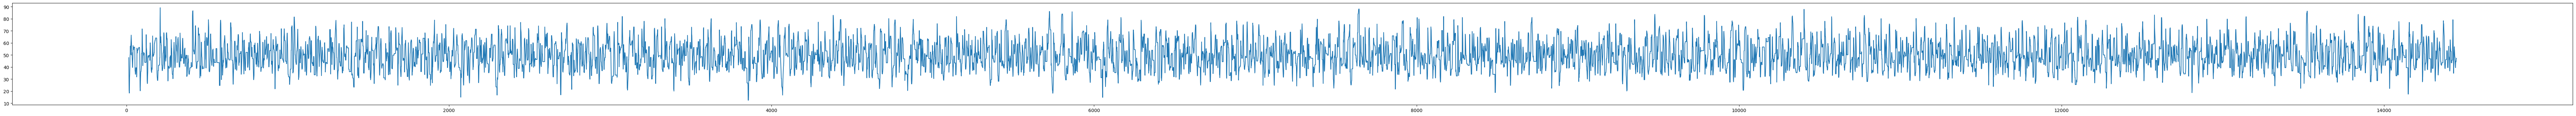

In [35]:
df1.ta.rsi(append=True).plot(figsize=(100,4))

<Axes: >

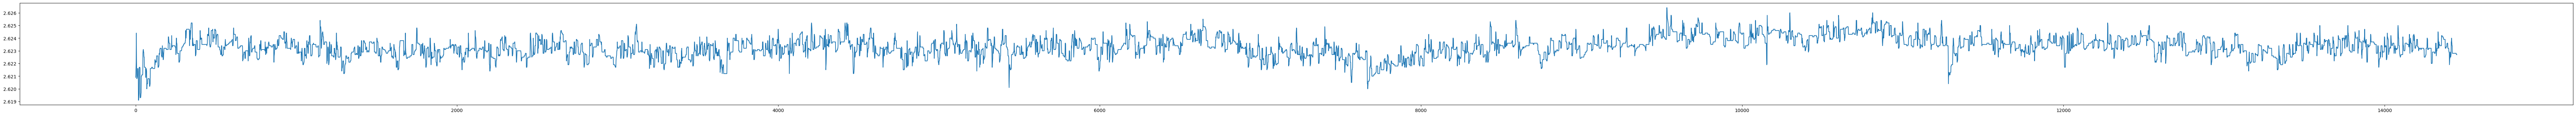

In [42]:
df1['62023A'].plot(figsize=(100,4))

<Axes: >

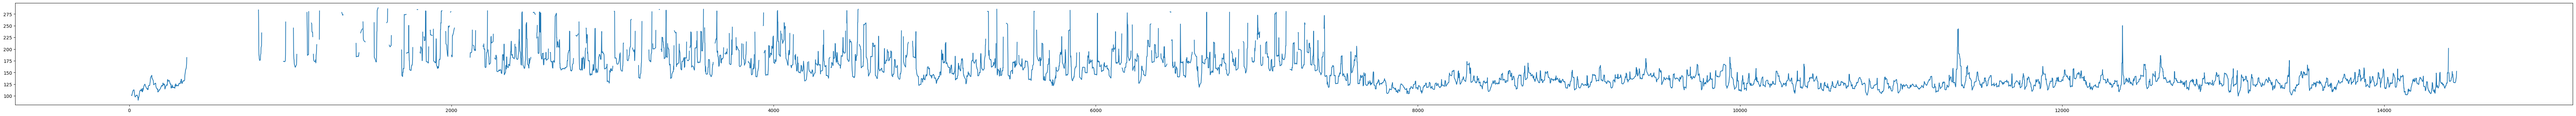

In [37]:
df1.ta.chop(append=True).plot(figsize=(100,4))

<Axes: >

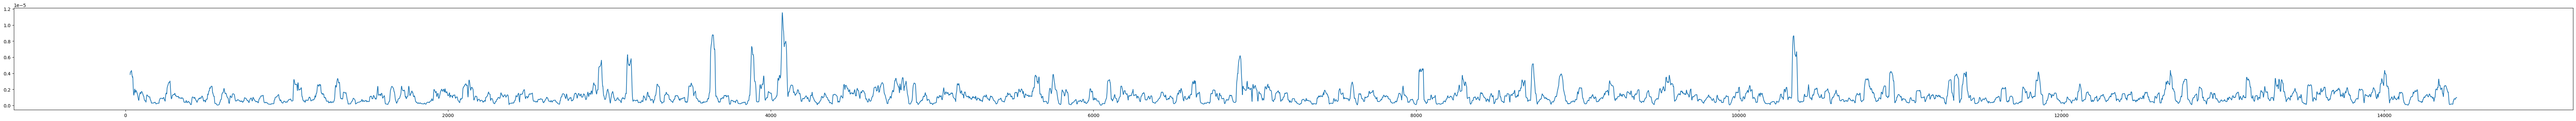

In [46]:
df1.ta.variance(append=True).plot(figsize=(100,4))

<Axes: >

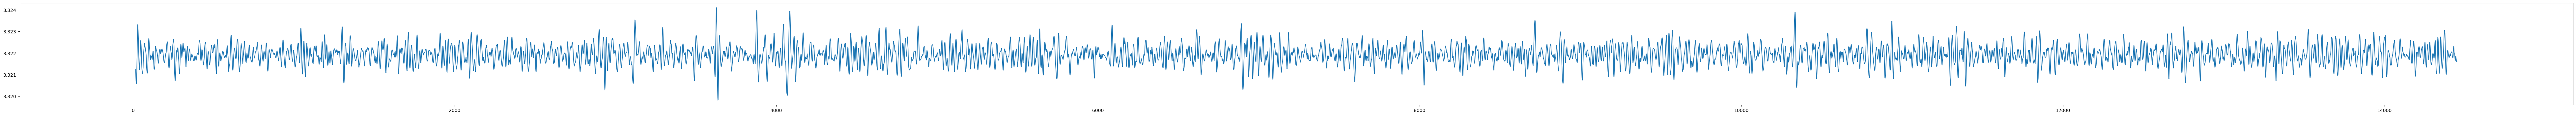

In [51]:
df1.ta.entropy(append=True).plot(figsize=(100,4))

<Axes: >

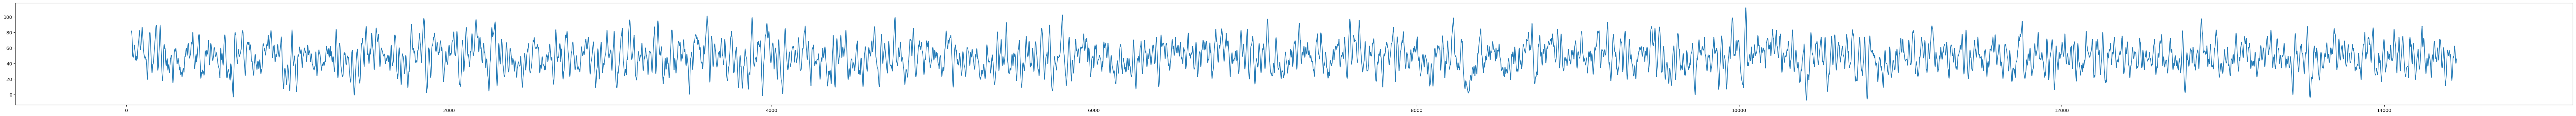

In [47]:
df1.ta.inertia(append=True).plot(figsize=(100,4))

<Axes: >

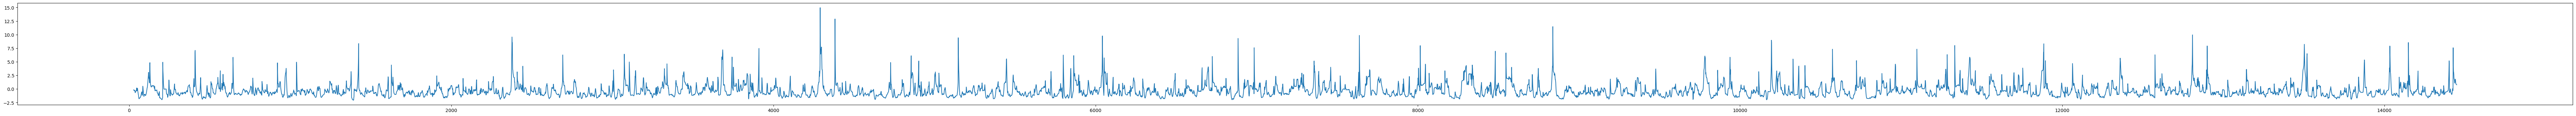

In [49]:
df1.ta.kurtosis(append=True).plot(figsize=(100,4))

In [52]:
# find out which indicators use particular OHLC values - then isolate to apply to only a unique sample test
df1

62023A  62023B  62023C  62023D    open    high     low   close  \
0      2.6209  2.6241  2.6195  2.6188  2.6209  2.6241  2.6195  2.6188   
1      2.6212  2.6241  2.6195  2.6188  2.6212  2.6241  2.6195  2.6188   
2      2.6217  2.6241  2.6195  2.6187  2.6217  2.6241  2.6195  2.6187   
3      2.6221  2.6241  2.6195  2.6184  2.6221  2.6241  2.6195  2.6184   
4      2.6244  2.6242  2.6195  2.6184  2.6244  2.6242  2.6195  2.6184   
5      2.6225  2.6242  2.6195  2.6185  2.6225  2.6242  2.6195  2.6185   
6      2.6214  2.6237  2.6196  2.6187  2.6214  2.6237  2.6196  2.6187   
7      2.6208  2.6237  2.6196  2.6187  2.6208  2.6237  2.6196  2.6187   
8      2.6208  2.6237  2.6196  2.6211  2.6208  2.6237  2.6196  2.6211   
...       ...     ...     ...     ...     ...     ...     ...     ...   
14441  2.6228  2.6208  2.6189  2.6129  2.6228  2.6208  2.6189  2.6129   
14442  2.6228  2.6208  2.6189  2.6123  2.6228  2.6208  2.6189  2.6123   
14443  2.6228  2.6208  2.6189  2.6121  2.6228  2.6208  2.6189  2.6121   
14444  2.6228  2.6208  2.6189  2.6125  2.6228  2.6208  2.6189  2.6125   
14445  2.6228  2.6208  2.6189  2.6127  2.6228  2.6208  2.6189  2.6127   
14446  2.6227  2.6208  2.6189  2.6126  2.6227  2.6208  2.6189  2.6126   
14447  2.6227  2.6208  2.6189  2.6127  2.6227  2.6208  2.6189  2.6127   
14448  2.6227  2.6208  2.6189  2.6129  2.6227  2.6208  2.6189  2.6129   
14449  2.6227  2.6208  2.6202  2.6129  2.6227  2.6208  2.6202  2.6129   

        kf_mean  BBL_14_2.0  BBM_14_2.0  BBU_14_2.0  BBB_14_2.0  BBP_14_2.0  \
0      1.310450         NaN         NaN         NaN         NaN         NaN   
1      1.753154         NaN         NaN         NaN         NaN         NaN   
2      1.977257         NaN         NaN         NaN         NaN         NaN   
3      2.113558         NaN         NaN         NaN         NaN         NaN   
4      2.206147         NaN         NaN         NaN         NaN         NaN   
5      2.272989         NaN         NaN         NaN         NaN         NaN   
6      2.323752         NaN         NaN         NaN         NaN         NaN   
7      2.363770         NaN         NaN         NaN         NaN         NaN   
8      2.396265         NaN         NaN         NaN         NaN         NaN   
...         ...         ...         ...         ...         ...         ...   
14441  2.622850    2.611550    2.613579    2.615607    0.155237    0.332751   
14442  2.622845    2.611528    2.613350    2.615172    0.139415    0.211807   
14443  2.622841    2.611385    2.613171    2.614958    0.136718    0.200106   
14444  2.622837    2.611297    2.613079    2.614860    0.136325    0.337584   
14445  2.622833    2.611556    2.613157    2.614758    0.122555    0.357257   
14446  2.622821    2.611696    2.613200    2.614704    0.115129    0.300569   
14447  2.622809    2.611713    2.613207    2.614701    0.114321    0.330243   
14448  2.622799    2.611675    2.613150    2.614625    0.112893    0.415256   
14449  2.622789    2.611699    2.613057    2.614415    0.103937    0.442141   

          RSI_14  CHOP_14_1_100     ISA_9   ISB_26    ITS_9   IKS_26  ICS_26  \
0            NaN            NaN       NaN      NaN      NaN      NaN  2.6188   
1            NaN            NaN       NaN      NaN      NaN      NaN  2.6197   
2            NaN            NaN       NaN      NaN      NaN      NaN  2.6203   
3            NaN            NaN       NaN      NaN      NaN      NaN  2.6216   
4            NaN            NaN       NaN      NaN      NaN      NaN  2.6211   
5            NaN            NaN       NaN      NaN      NaN      NaN  2.6206   
6            NaN            NaN       NaN      NaN      NaN      NaN  2.6189   
7            NaN            NaN       NaN      NaN      NaN      NaN  2.6193   
8            NaN            NaN       NaN      NaN  2.62185      NaN  2.6193   
...          ...            ...       ...      ...      ...      ...     ...   
14441  44.612983     128.648904  2.619475  2.62035  2.61935  2.61945     NaN   
14442

<Axes: >

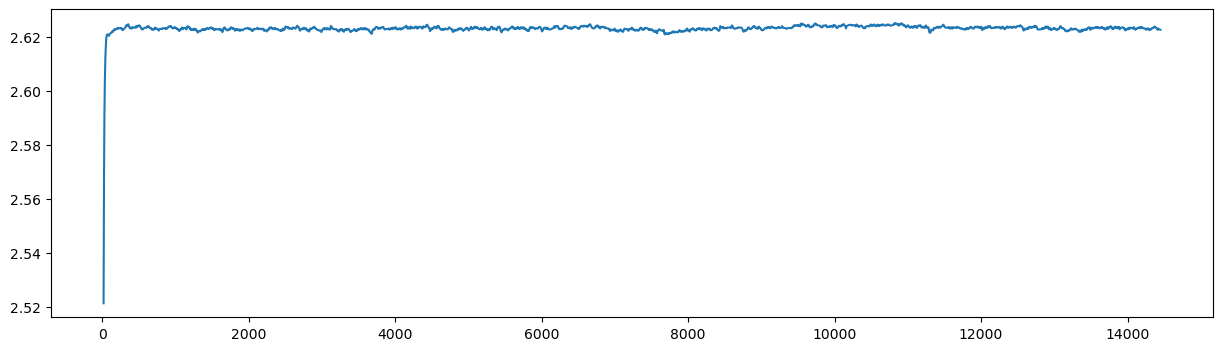

In [26]:
calculate_indicator(df1)[0]['kf_mean'][15:].plot(figsize=(15,4))

In [43]:
symbols = df1.columns.values

# iteration
for symbol in symbols:
    print(symbol)

62023A

62023B

62023C

62023D

open

high

low

close

kf_mean

BBL_14_2.0

BBM_14_2.0

BBU_14_2.0

BBB_14_2.0

BBP_14_2.0

RSI_14

CHOP_14_1_100

ISA_9

ISB_26

ITS_9

IKS_26

ICS_26

In [22]:
# get only 10 top buy & 10 top sell
df_top = results.sort_values(['Buy Signal','Archer MA Trending'],ascending=False)
top10 = df_top.sort_values(['RSI'],ascending=True).head(10).reset_index(drop=True)
top20 = df_top.sort_values(['RSI'],ascending=True).head(20).reset_index(drop=True)

df_bottom = results.sort_values(['Sell Signal','Archer MA Trending','RSI'],ascending=False)
bottom10 = df_bottom.head(10).reset_index(drop=True)
bottom20 = df_bottom.head(20).reset_index(drop=True)

In [23]:
if any(top20['Buy Signal'] == True): 
    print("The charts below are assets that were identified as reasonable 'entry points' - sorted by ema crossovers, trends, & rsi values.")
    print("Great entry points for:")
    [print(y) for y in top10[top10['Buy Signal'] == True].Symbol.items()]
    
if all(top20['Buy Signal'] == False): 
    print("No recommended long positions today. Showing results sorted by significance of crossovers, trends, & rsi values.")

No recommended long positions today. Showing results sorted by significance of crossovers, trends, & rsi values.

In [24]:
top20.style.applymap(color_boolean)


In [ ]:

# plots for top10
[plot(symbol) for i,symbol in top20.Symbol.items()]


In [44]:
# Prints the indicators and utility functions
results.ta.indicators()

# Returns a list of indicators and utility functions
ind_list = results.ta.indicators(as_list=True)

# Returns a list of the indicators and utility functions that are not in the excluded list
smaller_list = results.ta.indicators(exclude=["cg", "pgo", "ui"], as_list=True)

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 